In [1]:
import nltk
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import pylab as pl
import pickle

tweet_train = pd.read_csv("/Users/huafa/Downloads/Tweets.csv")
tweet_train = tweet_train[tweet_train['sentiment'] != 'neutral']

X=tweet_train['text']
y=tweet_train['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

# Ensure X_train and X_test contain strings or bytes-like objects
# Convert non-string data to strings if needed
X_train = [str(tweet) for tweet in X_train]
X_test = [str(tweet) for tweet in X_test]


def preprocess(tweet):
    
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Convert @username to __USERHANDLE
    tweet = re.sub('@[^\s]+','__USERHANDLE',tweet)  
    #tweet = re.sub('@[^\s]+',' ',tweet) 
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #trim
    tweet = tweet.strip('\'"')
    
    # Repeating words like hellloooo
    repeat_char = re.compile(r"(.)\1{1,}", re.IGNORECASE)
    tweet = repeat_char.sub(r"\1\1", tweet)
    
    #Emoticons
    emoticons = \
    [
     ('__positive__',[ ':-)', ':)', '(:', '(-:', \
                       ':-D', ':D', 'X-D', 'XD', 'xD', \
                       '<3', ':\*', ';-)', ';)', ';-D', ';D', '(;', '(-;', ] ),\
     ('__negative__', [':-(', ':(', '(:', '(-:', ':,(',\
                       ':\'(', ':"(', ':((','D:' ] ),\
    ]

    def replace_parenthesis(arr):
       return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]
    
    def join_parenthesis(arr):
        return '(' + '|'.join( arr ) + ')'

    emoticons_regex = [ (repl, re.compile(join_parenthesis(replace_parenthesis(regx))) ) \
            for (repl, regx) in emoticons ]
    
    for (repl, regx) in emoticons_regex :
        tweet = re.sub(regx, ' '+repl+' ', tweet)

     #Convert to lower case
    tweet = tweet.lower()
    
    return tweet

# Tokenizing and Stemming of Tweets
def stem(tweet):
        stemmer = nltk.stem.PorterStemmer()
        tweet_stem = ''
        words = [word if(word[0:2]=='__') else word.lower() \
                    for word in tweet.split() \
                    if len(word) >= 3]
        words = [stemmer.stem(w) for w in words] 
        tweet_stem = ' '.join(words)
        return tweet_stem



# Apply preprocessing steps with checks for string-like objects
X_train = [stem(preprocess(tweet)) if isinstance(tweet, str) else '' for tweet in X_train]
X_test = [stem(preprocess(tweet)) if isinstance(tweet, str) else '' for tweet in X_test]



0.8649556981362664
[[1348  184]
 [ 258 1483]]
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1532
    positive       0.89      0.85      0.87      1741

    accuracy                           0.86      3273
   macro avg       0.86      0.87      0.86      3273
weighted avg       0.87      0.86      0.87      3273



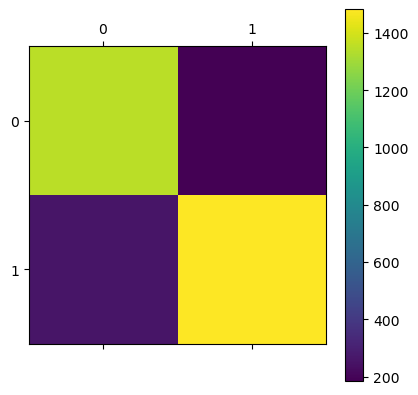

In [2]:
# Train Multinomial Naive Beyes model
from sklearn.naive_bayes import MultinomialNB
vec = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2))
X_train_vec = vec.fit_transform(X_train)
mnb = MultinomialNB()
mnb.fit(X_train_vec,y_train)
X_test_vec = vec.transform(X_test)
pred = mnb.predict(X_test_vec)
fitted = mnb.predict(X_train_vec)

print(metrics.accuracy_score(y_test, pred)) # multi-class

print(metrics.confusion_matrix(y_test, pred))

print(metrics.classification_report(y_test, pred))

cm = metrics.confusion_matrix(y_test, pred)
pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


0.8670944087992667
[[1385  147]
 [ 288 1453]]
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1532
    positive       0.91      0.83      0.87      1741

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273



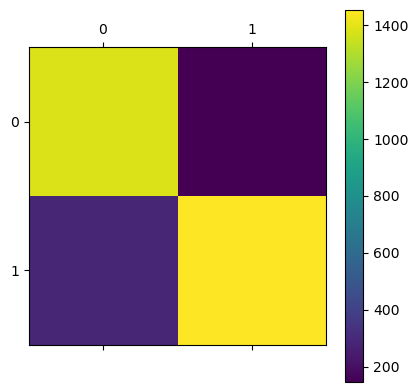

In [3]:
# Train complement Naive Beyes model
from sklearn.naive_bayes import ComplementNB

X_train_vec = vec.fit_transform(X_train)
cnb = ComplementNB()
cnb.fit(X_train_vec,y_train)
cnb_pred = cnb.predict(X_test_vec)
fitted = cnb.predict(X_train_vec)

print(metrics.accuracy_score(y_test, cnb_pred)) # multi-class

print(metrics.confusion_matrix(y_test, cnb_pred))

print(metrics.classification_report(y_test, cnb_pred))

cm = metrics.confusion_matrix(y_test, cnb_pred)
pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


0.8664833486098381
[[1402  130]
 [ 307 1434]]
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1532
    positive       0.92      0.82      0.87      1741

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273



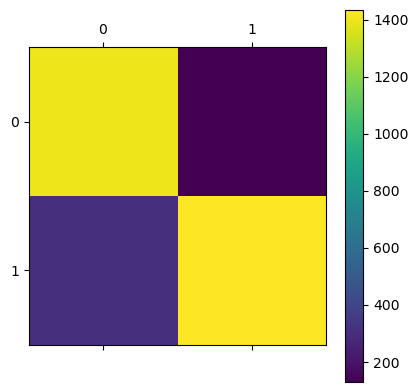

In [4]:
# Train Bernoulli Naive Beyes model
from sklearn.naive_bayes import BernoulliNB

X_train_vec = vec.fit_transform(X_train)
bnb = BernoulliNB()
bnb.fit(X_train_vec,y_train)
bnb_pred = bnb.predict(X_test_vec)
fitted = bnb.predict(X_train_vec)

print(metrics.accuracy_score(y_test, bnb_pred)) # multi-class

print(metrics.confusion_matrix(y_test, bnb_pred))

print(metrics.classification_report(y_test, bnb_pred))

cm = metrics.confusion_matrix(y_test, bnb_pred)
pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()



0.8065994500458296
[[1216  316]
 [ 317 1424]]
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79      1532
    positive       0.82      0.82      0.82      1741

    accuracy                           0.81      3273
   macro avg       0.81      0.81      0.81      3273
weighted avg       0.81      0.81      0.81      3273



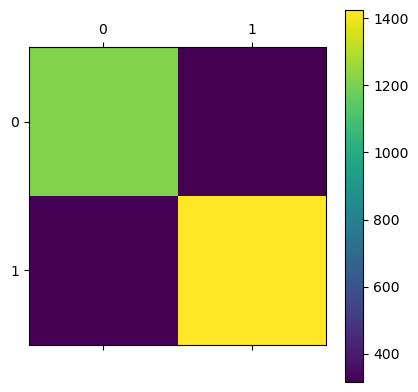

In [6]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train_vec, y_train)

# Predict on the test set
dt_pred = dt_classifier.predict(X_test_vec)

# Display classification report

print(metrics.accuracy_score(y_test, dt_pred)) # multi-class

print(metrics.confusion_matrix(y_test, dt_pred))

print(metrics.classification_report(y_test, dt_pred))

cm = metrics.confusion_matrix(y_test, dt_pred)
pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


0.8603727467155515
[[1343  189]
 [ 268 1473]]
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      1532
    positive       0.89      0.85      0.87      1741

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



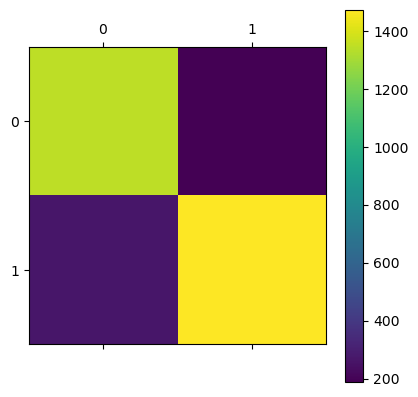

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_vec, y_train)

# Predict on the test set
rf_pred = rf_classifier.predict(X_test_vec)

# Display classification report

print(metrics.accuracy_score(y_test, rf_pred)) # multi-class

print(metrics.confusion_matrix(y_test, rf_pred))

print(metrics.classification_report(y_test, rf_pred))

cm = metrics.confusion_matrix(y_test, rf_pred)
pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [8]:
# Since the cnb model has the highest accuracy rate, we will use cnb for our sentiment classifier
process_data = pd.read_csv("/Users/huafa/Downloads/tweet_grouped_data.csv")

# Check and convert the 'tweet' column to strings if needed
process_data['tweet'] = process_data['tweet'].astype(str)

# Apply preprocessing steps to each tweet in the DataFrame
tweets = [preprocess(str(tweet)) for tweet in process_data['tweet']]
pred_tweets = [stem(tweet) for tweet in tweets]
# Proceed with further processing or transformations based on 'pred_tweets'



X_test = [stem(preprocess(tweet)) for tweet in pred_tweets]

X_test_vec = vec.transform(X_test)
pred_bayes = cnb.predict(X_test_vec)
process_data["sentiment_bayes"] = pred_bayes


pred_rf = rf_classifier.predict(X_test_vec)
process_data["sentiment_rf"] = pred_rf

pred_dt = dt_classifier.predict(X_test_vec)
process_data["sentiment_dt"] = pred_dt


In [9]:
process_data

,date,tweet,sentiment_bayes,sentiment_rf,sentiment_dt
0,2021-02-01,feels weird helping make hopefully good versio...,negative,positive,negative
1,2021-02-02,off twitter forwhileмы сделаемit will be fille...,negative,negative,positive
2,2021-02-04,the most entertaining outcome is the most like...,negative,negative,negative
3,2021-02-05,yeah by default engine with least lever arm wo...,negative,negative,positive
4,2021-02-06,thatdamianjustscratchthe future currency of ea...,positive,positive,positive
...,...,...,...,...,...
347,2022-01-27,i am in awe of swedencanadian truckers rulebid...,negative,negative,positive
348,2022-01-28,if you scare people enough they will demand re...,negative,negative,negative
349,2022-01-29,lie back and think of marsthe universe ishydro...,negative,negative,negative
350,2022-01-30,how many gene sequence changes to covid 19 bef...,negative,negative,negative


In [12]:
process_data['sentiment_bayes'].value_counts()

negative    246
positive    106
Name: sentiment, dtype: int64

In [10]:
process_data['sentiment_rf'].value_counts()

negative    181
positive    171
Name: sentiment_rf, dtype: int64

In [11]:
process_data['sentiment_dt'].value_counts()

positive    182
negative    170
Name: sentiment_dt, dtype: int64

In [12]:
process_data.to_csv('/Users/huafa/Downloads/nb_tweet_pred.csv', index=False)

In [18]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(process_data['sentiment_bayes'], process_data['sentiment_rf'])

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Confusion Matrix:")
print(cm)
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")

Confusion Matrix:
[[157  89]
 [ 24  82]]
Sensitivity (Recall): 0.7735849056603774
Specificity: 0.6382113821138211


In [19]:
# Create a confusion matrix
cm2 = confusion_matrix(process_data['sentiment_bayes'], process_data['sentiment_dt'])

# Calculate specificity
tn, fp, fn, tp = cm2.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Confusion Matrix:")
print(cm2)
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")

Confusion Matrix:
[[137 109]
 [ 33  73]]
Sensitivity (Recall): 0.6886792452830188
Specificity: 0.556910569105691


In [20]:
# Create a confusion matrix
cm3 = confusion_matrix(process_data['sentiment_rf'], process_data['sentiment_dt'])

# Calculate specificity
tn, fp, fn, tp = cm3.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Confusion Matrix:")
print(cm3)
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")

Confusion Matrix:
[[130  51]
 [ 40 131]]
Sensitivity (Recall): 0.7660818713450293
Specificity: 0.7182320441988951
